In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
import folium



from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import cross_val_score
from scipy.stats import skew
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor


In [24]:
list = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구',
       '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

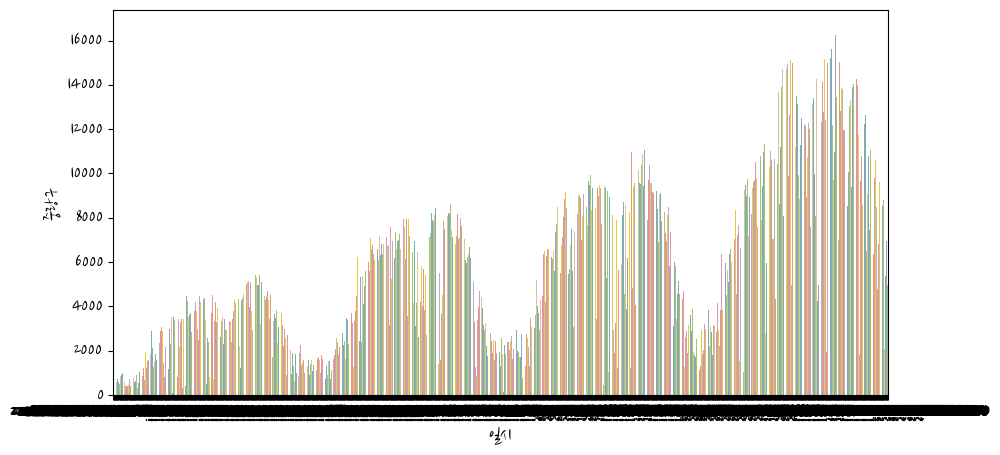

In [104]:
 plt.subplots(figsize=(10, 5))
for i in list:
    sns.barplot(data=df, x='year', y = i, palette='Set2')
# plt.savefig('myfigure.png', transparent = True)

In [165]:
bar = []
for i in list:
    bar.append(df[i].sum())

In [168]:
bar=pd.DataFrame(bar)

In [169]:
list=pd.DataFrame(list)

In [171]:
bar = pd.concat([bar,list], axis=1)

In [174]:
bar= bar[['자치구','대여량', ]]

In [175]:
bar = bar.sort_values('대여량', ascending=False).reset_index(drop=True)
bar['대여량']= bar['대여량'].astype('int')
bar.style.background_gradient(cmap='BuGn')


,자치구,대여량
0,영등포구,7031847
1,강서구,6689153
2,송파구,6654142
3,마포구,5570756
4,광진구,4520200
5,노원구,4413184
6,성동구,3756025
7,양천구,3542988
8,종로구,3396629
9,서초구,3324262


In [164]:
df

0     7031847
1     6689153
2     6654142
3     5570756
4     4520200
5     4413184
6     3756025
7     3542988
8     3396629
9     3324262
10    3168914
11    3143306
12    3045294
13    2965458
14    2894009
15    2616934
16    2510794
17    2369528
18    2281097
19    2049760
20    1993113
21    1852074
22    1593827
23    1539673
24    1363406
Name: 대여량, dtype: int32

In [117]:
bar.count()


In [137]:
import requests
import json

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=bar, 
             columns=['자치구','대여량'],
             fill_color='BuGn', # 색상 변경도 가능하다
             fill_opacity=0.6,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 대여량 수"
            )
m

In [252]:
b = df.groupby('year')[['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구',
       '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']].sum().reset_index()

In [253]:
b['year']= b['year'].astype('str')

In [254]:
yee = test5.groupby('year')['영등포구'].sum().reset_index()

In [255]:
yee['month'] = yee['month'].astype('str')

KeyError: 'month'

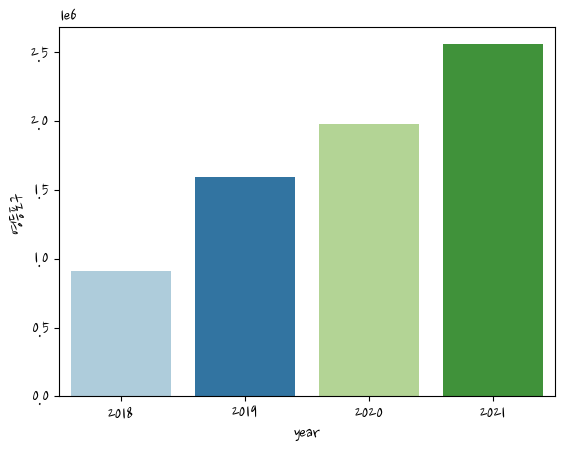

In [257]:
ax = sns.barplot(data=yee, x='year', y='영등포구', palette='Paired' )
plt.savefig('myfigure.png', transparent = True)

In [235]:
yee = test5.groupby('month')['영등포구'].sum().reset_index()

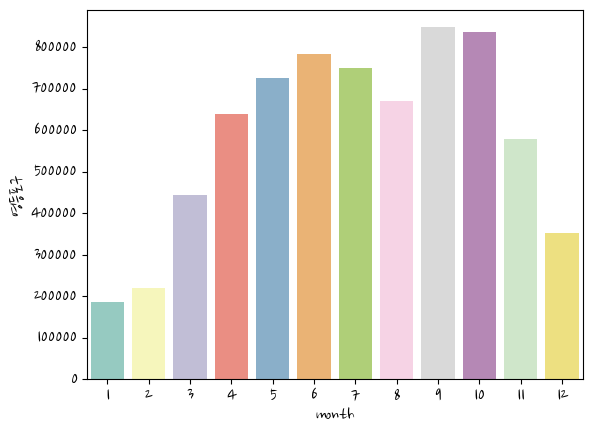

In [244]:
ax = sns.barplot(data=yee, x='month', y='영등포구', palette="Set3" )
ax
plt.savefig('myfigure.png', transparent = True)

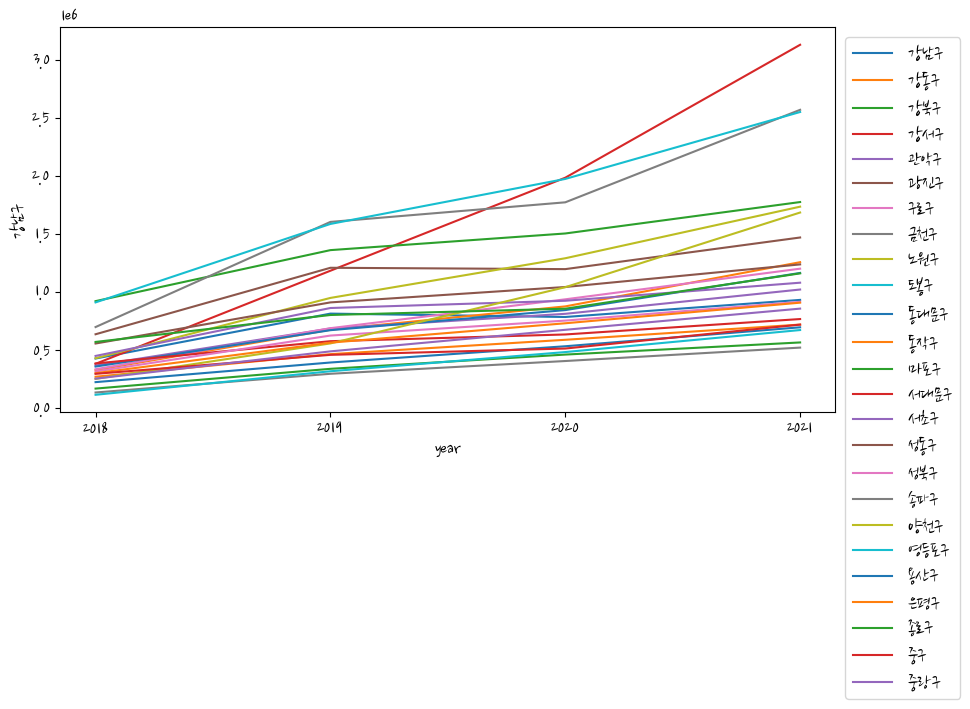

In [77]:
 plt.subplots(figsize=(10, 5))
for i in list:
    sns.lineplot(data=b, x='year', y = i)
plt.legend(labels = list,loc = 2, bbox_to_anchor = (1,1))
# plt.savefig('myfigure.png', transparent = True)

In [14]:
df.head()

,일시,평균기온,최저기온,최고기온,일강수량,최대순간풍속,최대순간풍속풍향,최대풍속,최대풍속풍향,평균풍속,...,영등포구,용산구,은평구,종로구,중구,중랑구,일합계,year,month,day
0,2018-01-01,-1.3,-5.1,3.8,0.0,7.0,320,3.8,290,1.4,...,421.0,134.0,173.0,375.0,179.0,81.0,4945.0,2018,1,1
1,2018-01-02,-1.8,-4.3,1.8,0.0,8.5,270,4.9,290,1.8,...,820.0,118.0,174.0,706.0,358.0,130.0,7119.0,2018,1,2
2,2018-01-03,-4.7,-7.1,-0.4,0.0,6.6,320,3.5,270,2.2,...,839.0,128.0,216.0,714.0,353.0,144.0,7140.0,2018,1,3
3,2018-01-04,-4.7,-8.7,-0.7,0.0,5.8,320,3.5,320,1.4,...,749.0,113.0,208.0,780.0,367.0,146.0,7074.0,2018,1,4
4,2018-01-05,-3.0,-5.6,1.6,0.0,8.0,250,3.6,270,1.7,...,878.0,136.0,205.0,797.0,420.0,154.0,7686.0,2018,1,5


In [249]:
df = pd.read_csv('data_따릉/2018-2021년_2_자치구별_따릉이_이용건수.csv')
df.drop(columns='Unnamed: 0', inplace=True)

df['일시']=pd.to_datetime(df['일시']) # 날짜형식으로 변경
df['year'] = df.일시.apply(lambda x : x.year)
df['month'] = df.일시.apply(lambda x : x.month)
df['day'] = df.일시.apply(lambda x : x.day)

In [12]:
test5.columns

Index(['평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속', '최대풍속풍향',
       '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압', '평균전운량',
       '평균중하층운량', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부', '요일',
       '계절', 'year', 'month', 'day', '영등포구'],
      dtype='object')

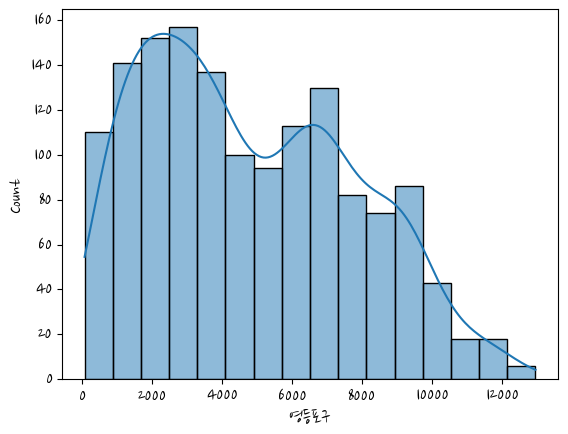

In [181]:
sns.histplot(df['영등포구'], kde=True) # 정규분포 확인
test5 = df[['평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속',
       '최대풍속풍향', '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압',
       '평균전운량', '평균중하층운량', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부',
      '요일', '계절', 'year', 'month',
       'day', '영등포구']] #확인할 컬럼 추출

In [8]:
def get_rmse(model):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, 'RMSE: ', np.round(rmse,3))
    print(f'R2: {r2_score(y_test, pred)}')
    return rmse
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
        
    return rmses

In [180]:
X = test5.drop(columns=['영등포구'])
y = test5['영등포구']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)
lr_reg = LinearRegression() #선형회귀
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

NameError: name 'test5' is not defined

In [10]:
y_train

401     1058.0
582     5777.0
376     1084.0
271     5858.0
718     2479.0
         ...  
849     8048.0
1034    6632.0
811     6373.0
1442    5071.0
716     2653.0
Name: 영등포구, Length: 1168, dtype: float64

In [11]:
# 계산처리 안할거 문자로 바꾸기
test5[[ '강수여부','휴일여부','요일', '계절', 'year', 'month','day',]]= test5[[ '강수여부','휴일여부','요일', '계절', 'year', 'month','day']].astype('str')
# 왜곡도 확인
features_index = test5.dtypes[test5.dtypes != 'object'].index
skew_features= test5[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features>1]
skew_features_top.sort_values(ascending=False)
# 왜곡도 1 이상은 로그로 변환
test5[skew_features_top.index]= np.log1p(test5[skew_features_top.index])

In [12]:
# y값 정규분포로 변환
log_test = np.log1p(test5['영등포구'])

<AxesSubplot:xlabel='영등포구', ylabel='Count'>

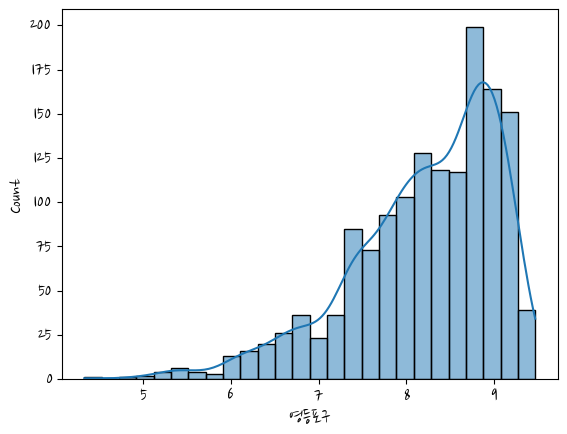

In [14]:
sns.histplot(log_test, kde=True)

In [21]:
# 문자열 치환 원앤핫인코딩
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [22]:
# 모델 확인
lr_reg = LinearRegression()
lr_reg.fit(X_train, np.expm1(y_train))
pred = lr_reg.predict(X_test)
mse = mean_squared_error(np.expm1(y_test), pred)
rmse = np.sqrt(mse)
print(f'lr_reg MSE:  {mse}, RMSE: {rmse}, R2: {r2_score(np.expm1(y_test), pred)}')

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
pred =ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'ridge_reg MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
pred =lasso_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'lasso_reg MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

lr_reg MSE:  1340467.602808152, RMSE: 1157.785646312888, R2: 0.8486348465010377
ridge_reg MSE: 0.07223866977812696, RMSE: 0.26877252422471865, R2: 0.8958494585535265
lasso_reg MSE: 0.45629333547500994, RMSE: 0.6754948819014175, R2: 0.3421363087927579


In [23]:
np.expm1(0.26877252422471865)

0.3083574875594436

In [24]:
# 루트치환값 다시 원래대로 돌려서 비교
y_t= np.expm1(y_test)
p_t = np.expm1(pred)
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}')

3612.9999999999977, 4727.34273438681
7810.000000000003, 5588.134556767158
9410.999999999993, 4336.901364442667
4173.999999999999, 3712.402023111175
1100.9999999999995, 4453.154106526761
596.0000000000001, 4348.909787666684
2553.0000000000005, 1826.414694242753
8704.0, 4004.414803394889
5704.000000000002, 3119.3357094847197
2302.0000000000005, 5244.697597026896
5091.000000000003, 4954.512987132653
6224.0, 3628.9308981147296
7955.999999999996, 6594.60895799983
761.9999999999999, 3471.340522236536
9192.000000000002, 4358.612656581883
4667.0, 4857.955013750789
11707.00000000001, 5439.864361623959
8565.999999999996, 5586.580023652162
9699.000000000004, 4217.2674672267685
2573.000000000001, 2421.846743702024
7300.999999999994, 5154.9736604569325
9872.000000000004, 5802.219964711817
6212.000000000005, 3704.794493398071
8302.999999999995, 4730.908748470805
7578.000000000002, 3441.8779254751244
6156.999999999998, 2815.6765650801976
5918.9999999999945, 4219.399105877568
7197.000000000004, 3782.5

# 실제 2022년꺼 예측해보기

In [17]:
tt18 = df[df['year']==2018]
tt19 = df[df['year']==2019]
tt20 = df[df['year']==2020]
tt21 = df[df['year']==2021]

In [18]:
tt18

,일시,평균기온,최저기온,최고기온,일강수량,최대순간풍속,최대순간풍속풍향,최대풍속,최대풍속풍향,평균풍속,...,영등포구,용산구,은평구,종로구,중구,중랑구,일합계,year,month,day
0,2018-01-01,-1.3,-5.1,3.8,0.0,7.0,320,3.8,290,1.4,...,421.0,134.0,173.0,375.0,179.0,81.0,4945.0,2018,1,1
1,2018-01-02,-1.8,-4.3,1.8,0.0,8.5,270,4.9,290,1.8,...,820.0,118.0,174.0,706.0,358.0,130.0,7119.0,2018,1,2
2,2018-01-03,-4.7,-7.1,-0.4,0.0,6.6,320,3.5,270,2.2,...,839.0,128.0,216.0,714.0,353.0,144.0,7140.0,2018,1,3
3,2018-01-04,-4.7,-8.7,-0.7,0.0,5.8,320,3.5,320,1.4,...,749.0,113.0,208.0,780.0,367.0,146.0,7074.0,2018,1,4
4,2018-01-05,-3.0,-5.6,1.6,0.0,8.0,250,3.6,270,1.7,...,878.0,136.0,205.0,797.0,420.0,154.0,7686.0,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,-10.1,-12.5,-6.5,0.0,10.4,320,5.8,290,3.5,...,1039.0,180.0,333.0,712.0,378.0,320.0,11322.0,2018,12,27
361,2018-12-28,-10.5,-14.4,-6.6,0.0,8.2,340,4.4,270,2.5,...,991.0,170.0,318.0,731.0,349.0,263.0,10444.0,2018,12,28
362,2018-12-29,-7.6,-10.5,-3.0,0.0,9.4,340,5.5,320,2.9,...,580.0,142.0,302.0,448.0,195.0,231.0,8082.0,2018,12,29
363,2018-12-30,-6.8,-11.3,-0.9,0.0,5.6,340,3.1,340,1.2,...,586.0,144.0,284.0,414.0,176.0,230.0,7858.0,2018,12,30


In [166]:
 tt21 = tt21[tt21['일시'] < '2021-07-01']

In [167]:
tt21 = tt21[['month', 'day', '평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속',
       '최대풍속풍향', '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압',
       '평균전운량', '평균중하층운량', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부',
       '요일', '계절', '영등포구']]

In [168]:
tt21[[ '강수여부','휴일여부','요일', '계절', 'month','day',]]= tt21[[ '강수여부','휴일여부','요일', '계절', 'month','day']].astype('str')

In [169]:
tt21d = pd.get_dummies(tt21)

In [170]:
tt21d.shape

(181, 71)

In [171]:
tt21d.columns
# ['평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속', '최대풍속풍향',
#        '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압', '평균전운량',
#        '평균중하층운량', '일최심적설', '일최심신적설', '일 미세먼지 농도(㎍/㎥)', 'year_2022', 'month_1',
#        'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'day_1',
#        'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
#        'day_17', 'day_18', 'day_19', 'day_2', 'day_20', 'day_21', 'day_22',
#        'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29',
#        'day_3', 'day_30', 'day_31', 'day_4', 'day_5', 'day_6', 'day_7',
#        'day_8', 'day_9', '강수여부_0.0', '강수여부_1.0', '휴일여부_0', '휴일여부_1', '요일_0',
#        '요일_1', '요일_2', '요일_3', '요일_4', '요일_5', '요일_6', '계절_1', '계절_2', '계절_4']

Index(['평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속', '최대풍속풍향',
       '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압', '평균전운량',
       '평균중하층운량', '일최심적설', '일최심신적설', '일 미세먼지 농도(㎍/㎥)', '영등포구', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'day_1',
       'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
       'day_17', 'day_18', 'day_19', 'day_2', 'day_20', 'day_21', 'day_22',
       'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29',
       'day_3', 'day_30', 'day_31', 'day_4', 'day_5', 'day_6', 'day_7',
       'day_8', 'day_9', '강수여부_0.0', '강수여부_1.0', '휴일여부_0', '휴일여부_1', '요일_0',
       '요일_1', '요일_2', '요일_3', '요일_4', '요일_5', '요일_6', '계절_1', '계절_2', '계절_4'],
      dtype='object')

In [172]:
X = tt21d.drop(columns=['영등포구'])
y = tt21d['영등포구']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)
lr_reg = LinearRegression() #선형회귀
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

LinearRegression RMSE:  1695.002
R2: 0.7598552188951317
Ridge RMSE:  1600.821
R2: 0.7858007457444249
Lasso RMSE:  1671.991
R2: 0.7663314745817432


[1695.0022533651218, 1600.8206603301123, 1671.990526612321]

In [181]:
# 모델 확인

pred1 = lr_reg.predict(ttd)
# mse = mean_squared_error(np.expm1(y_test), pred)
# rmse = np.sqrt(mse)
# print(f'lr_reg MSE:  {mse}, RMSE: {rmse}, R2: {r2_score(np.expm1(y_test), pred)}')

pred2 =ridge_reg.predict(ttd)
# mse = mean_squared_error(y_test, pred)
# rmse = np.sqrt(mse)
# print(f'ridge_reg MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

pred3 =lasso_reg.predict(ttd)
# mse = mean_squared_error(y_test, pred)
# rmse = np.sqrt(mse)
# print(f'lasso_reg MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

In [180]:
ttd.drop(columns='year_2022', inplace=True)

In [178]:
tt21d.columns

Index(['평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속', '최대풍속풍향',
       '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압', '평균전운량',
       '평균중하층운량', '일최심적설', '일최심신적설', '일 미세먼지 농도(㎍/㎥)', '영등포구', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'day_1',
       'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
       'day_17', 'day_18', 'day_19', 'day_2', 'day_20', 'day_21', 'day_22',
       'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29',
       'day_3', 'day_30', 'day_31', 'day_4', 'day_5', 'day_6', 'day_7',
       'day_8', 'day_9', '강수여부_0.0', '강수여부_1.0', '휴일여부_0', '휴일여부_1', '요일_0',
       '요일_1', '요일_2', '요일_3', '요일_4', '요일_5', '요일_6', '계절_1', '계절_2', '계절_4'],
      dtype='object')

In [184]:
dat= pd.read_csv('답지.csv', index_col=0)

In [233]:
X_train = tt21d.drop(columns=['영등포구'])
X_test = ttd
y_train = dd
y_test = yy

In [219]:
dd

1096    1547.0
1097    1664.0
1098    1526.0
1099    2555.0
1100    2369.0
         ...  
1272    8334.0
1273    6795.0
1274    7765.0
1275    8772.0
1276    9932.0
Name: 영등포구, Length: 181, dtype: float64

In [234]:
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

LinearRegression RMSE:  2662.004
R2: 0.5993129272258495
Ridge RMSE:  2610.552
R2: 0.614652391091156
Lasso RMSE:  2651.093
R2: 0.6025908592012212


[2662.003700702809, 2610.5518506629346, 2651.0927091694048]

In [187]:
yy= dat['영등포구']

In [189]:
yy.shape

(181,)

In [190]:
pred1.shape

(181,)

0      2010
1      2065
2      4356
3      4474
4      4665
       ... 
176    9246
177    8155
178    9134
179    4408
180     743
Name: 영등포구, Length: 181, dtype: int64

In [192]:
for solve, predd in zip(yy, pred1):
    print(f'{solve}, {predd}')

2010, 2029.4225144737975
2065, 2308.8537083720294
4356, 3009.062716838642
4474, 2692.216421409463
4665, 3204.3554525195177
4768, 3815.2943675377974
4837, 3486.0073414975523
3306, 1820.4743621816706
2724, 2135.7494657006864
4894, 1383.6785874294364
3093, 3208.4278480556313
3647, 1392.9069354138592
3577, 672.0339622864994
4040, 2243.119597285804
3038, 2495.44224553433
2445, 2364.245429612998
2892, 1516.0352583796957
3636, 2647.399393378284
2316, 1065.0647005051978
3539, 1700.1259127302692
4255, 3476.5998458629983
3279, 3292.914935706147
3204, 4271.949052365828
5248, 4938.834848347062
4150, 1995.4980247429921
5183, 4088.933783461369
4918, 3457.7913460257914
4525, 3656.5334482118233
2507, 3656.750569742071
2031, 5110.206360375585
1983, 4762.176958201762
894, 2105.7144823326817
2082, 2682.8591902077605
3735, 3355.725391297343
3678, 1945.8722895643332
2215, 2755.8861936942194
2299, 3651.7895530858586
4354, 2357.489225551606
4886, 3428.188554378623
5189, 2888.027535041696
5370, 3154.696751147

In [197]:
tt20

,일시,평균기온,최저기온,최고기온,일강수량,최대순간풍속,최대순간풍속풍향,최대풍속,최대풍속풍향,평균풍속,...,영등포구,용산구,은평구,종로구,중구,중랑구,일합계,year,month,day
730,2020-01-01,-2.2,-6.5,0.3,0.1,4.8,50,2.6,50,0.6,...,1113.0,359.0,675.0,624.0,349.0,504.0,16235.0,2020,1,1
731,2020-01-02,1.0,-0.7,3.8,0.0,6.7,250,4.0,290,1.2,...,2441.0,545.0,906.0,1522.0,819.0,711.0,28888.0,2020,1,2
732,2020-01-03,-0.1,-3.4,4.6,0.0,5.8,270,3.5,270,1.7,...,2579.0,580.0,994.0,1660.0,886.0,817.0,30808.0,2020,1,3
733,2020-01-04,1.2,-2.8,6.1,0.0,8.5,340,4.5,320,1.9,...,1826.0,488.0,903.0,1097.0,533.0,696.0,25709.0,2020,1,4
734,2020-01-05,1.3,-3.2,6.6,0.0,4.4,180,2.9,70,1.1,...,1647.0,481.0,825.0,996.0,443.0,680.0,23206.0,2020,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2020-12-27,5.8,1.4,10.0,0.0,5.0,70,2.8,50,1.8,...,2736.0,1004.0,1168.0,1128.0,652.0,1019.0,36857.0,2020,12,27
1092,2020-12-28,6.7,4.2,11.4,1.3,5.9,270,3.1,290,1.4,...,3888.0,994.0,1380.0,2005.0,1274.0,1240.0,46421.0,2020,12,28
1093,2020-12-29,0.1,-6.2,4.3,0.2,10.2,290,6.1,320,2.9,...,2854.0,641.0,1062.0,1516.0,942.0,1059.0,35248.0,2020,12,29
1094,2020-12-30,-10.9,-12.9,-6.2,0.0,10.6,290,6.2,270,4.1,...,1709.0,417.0,673.0,1059.0,594.0,587.0,22194.0,2020,12,30


In [177]:
tt= pd.read_csv('data_따릉/2022_컬럼_전처리.csv')

In [178]:
tt.drop(columns='Unnamed: 0', inplace=True)

In [83]:
tt['일시']= pd.to_datetime(tt['일시'])

In [86]:
tt = tt[tt['일시'] < '2022-07-01']

In [87]:
tt['일시']= pd.to_datetime(tt['일시'])
tt['year'] = tt.일시.apply(lambda x : x.year)
tt['month'] = tt.일시.apply(lambda x : x.month)
tt['day'] = tt.일시.apply(lambda x : x.day)

In [97]:
tt= tt[['year', 'month', 'day', '평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속',
       '최대풍속풍향', '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압',
       '평균전운량', '평균중하층운량', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부',
       '요일', '계절']]

In [98]:
tt[[ '강수여부','휴일여부','요일', '계절', 'year', 'month','day',]]= tt[[ '강수여부','휴일여부','요일', '계절', 'year', 'month','day']].astype('str')

In [99]:
ttd = pd.get_dummies(tt)

In [200]:
ttd.columns

Index(['평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속', '최대풍속풍향',
       '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압', '평균전운량',
       '평균중하층운량', '일최심적설', '일최심신적설', '일 미세먼지 농도(㎍/㎥)', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'day_1', 'day_10', 'day_11',
       'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18',
       'day_19', 'day_2', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_3', 'day_30',
       'day_31', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9',
       '강수여부_0.0', '강수여부_1.0', '휴일여부_0', '휴일여부_1', '요일_0', '요일_1', '요일_2',
       '요일_3', '요일_4', '요일_5', '요일_6', '계절_1', '계절_2', '계절_4'],
      dtype='object')

,평균기온,최저기온,최고기온,일강수량,최대순간풍속,최대순간풍속풍향,최대풍속,최대풍속풍향,평균풍속,최다풍향,...,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,계절_1,계절_2,계절_4
0,-4.3,-10.2,2.3,0.0,4.5,70,2.8,20,1.5,50,...,0,0,0,0,0,1,0,0,0,1
1,-1.3,-5.2,3.0,0.3,8.1,290,4.6,290,2.3,50,...,0,0,0,0,0,0,1,0,0,1
2,-1.9,-8.0,2.5,0.0,6.9,270,4.1,250,1.8,270,...,1,0,0,0,0,0,0,0,0,1
3,-2.5,-5.6,1.0,0.0,6.8,270,4.2,250,2.4,290,...,0,1,0,0,0,0,0,0,0,1
4,-2.8,-7.8,1.9,0.0,4.2,50,2.9,50,1.7,50,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,26.5,24.8,28.1,0.0,8.5,230,5.0,180,2.6,180,...,0,0,0,0,0,0,1,0,1,0
177,26.8,25.4,28.1,6.1,13.7,200,6.0,200,2.8,200,...,1,0,0,0,0,0,0,0,1,0
178,26.9,25.7,27.9,6.3,20.9,180,9.9,200,5.8,200,...,0,1,0,0,0,0,0,0,1,0
179,25.1,24.4,26.1,37.8,17.3,180,9.0,200,4.1,200,...,0,0,1,0,0,0,0,0,1,0


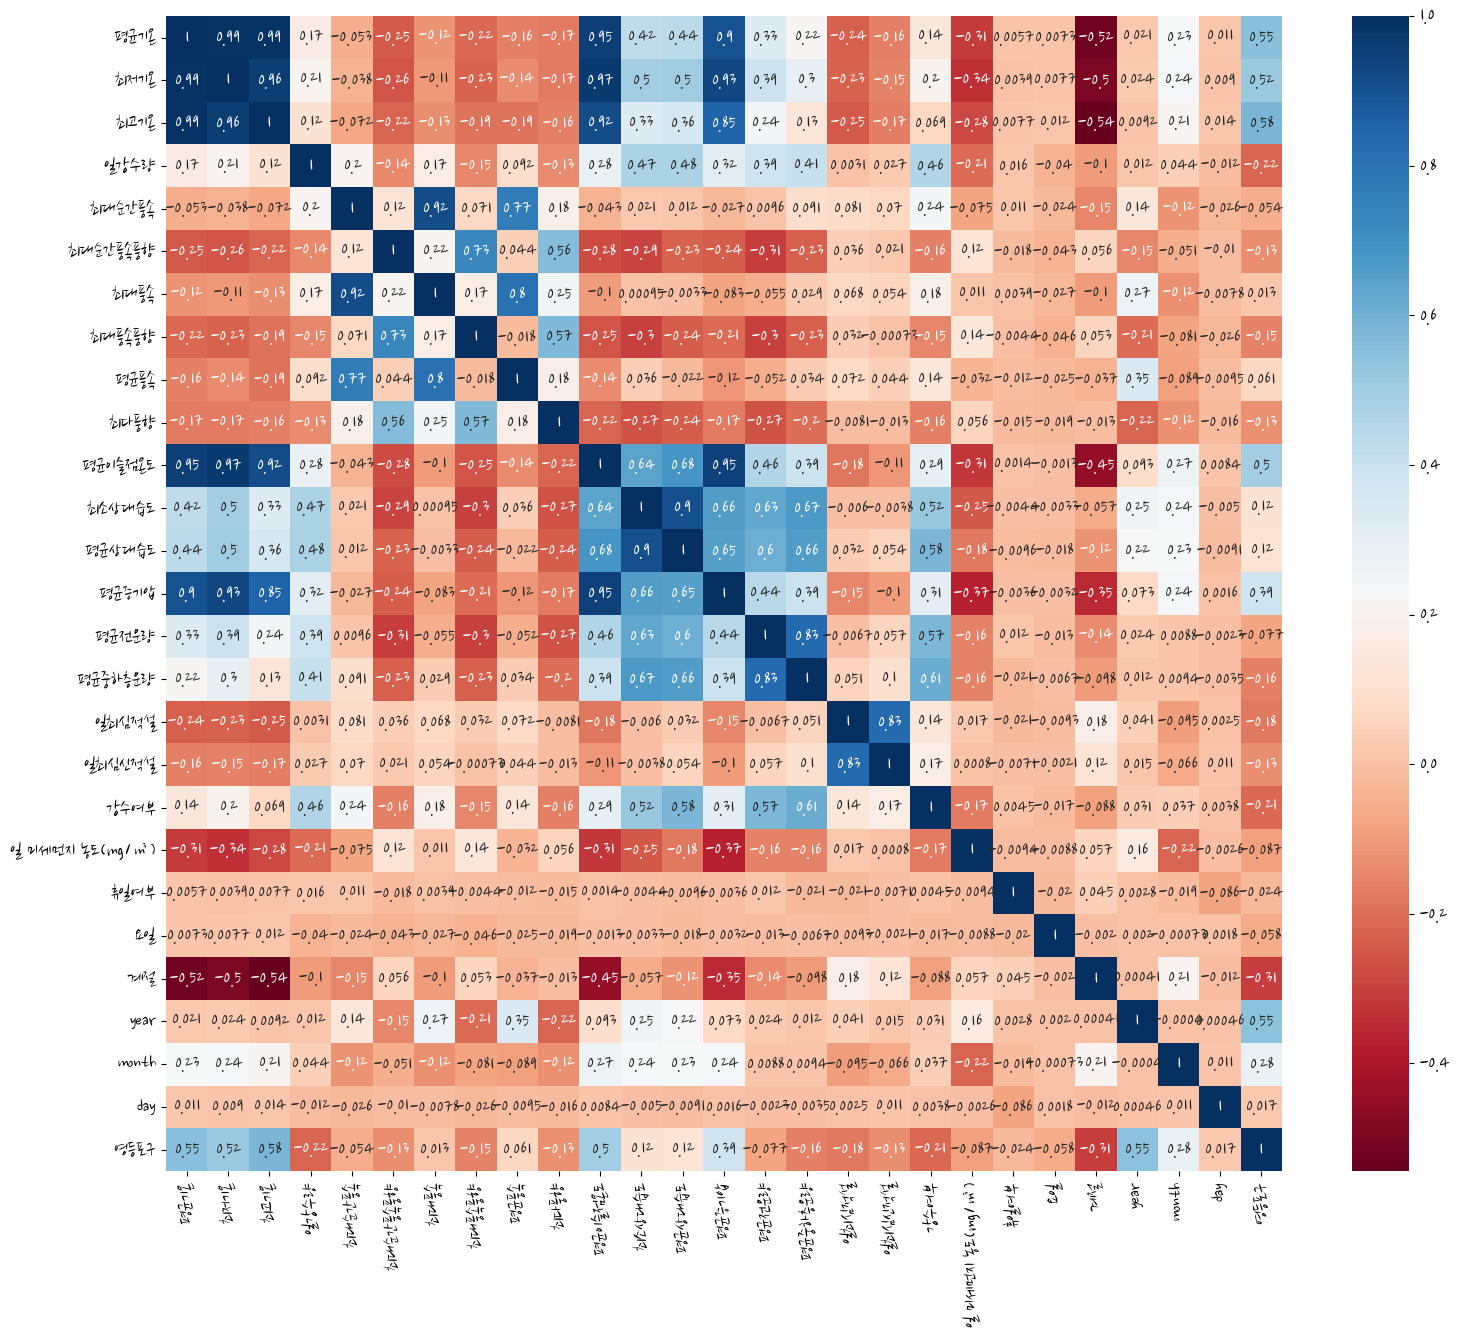

In [199]:

plt.figure(figsize=(18, 15))
corr = test5.corr()
sns.heatmap(corr, cmap='RdBu', annot=True)
plt.savefig('myfigure.png', transparent = True)

In [184]:
plt.figure(figsize=(18, 15))
corr = df.corr()
sns.heatmap(corr, cmap='RdBu', annot=True)
plt.savefig('myfigure.png', transparent = True)

,평균기온,최저기온,최고기온,일강수량,최대순간풍속,최대순간풍속풍향,최대풍속,최대풍속풍향,평균풍속,최다풍향,...,일최심신적설,강수여부,일 미세먼지 농도(㎍/㎥),휴일여부,요일,계절,year,month,day,영등포구
평균기온,1.000000,0.989262,0.989298,0.167209,-0.052606,-0.247186,-0.120256,-0.217364,-0.163182,-0.173740,...,-0.158147,0.139763,-0.312802,0.005741,0.007307,-0.524868,0.020501,0.228721,0.011061,0.552987
최저기온,0.989262,1.000000,0.961977,0.207990,-0.037999,-0.255516,-0.107246,-0.225704,-0.136413,-0.172935,...,-0.154145,0.200987,-0.338103,0.003899,0.007667,-0.497478,0.024259,0.236862,0.008969,0.516215
최고기온,0.989298,0.961977,1.000000,0.116954,-0.071656,-0.223159,-0.133513,-0.193023,-0.189789,-0.161378,...,-0.168644,0.068988,-0.280650,0.007650,0.011672,-0.544007,0.009212,0.211718,0.014147,0.578832
일강수량,0.167209,0.207990,0.116954,1.000000,0.204923,-0.143105,0.171503,-0.146468,0.091931,-0.134928,...,0.027360,0.461275,-0.209309,0.016174,-0.040127,-0.102394,0.012222,0.043847,-0.011569,-0.220866
최대순간풍속,-0.052606,-0.037999,-0.071656,0.204923,1.000000,0.123557,0.916619,0.070730,0.766572,0.182043,...,0.069739,0.242292,-0.074958,0.011407,-0.023977,-0.150865,0.137265,-0.118294,-0.026377,-0.054390
최대순간풍속풍향,-0.247186,-0.255516,-0.223159,-0.143105,0.123557,1.000000,0.215657,0.733819,0.044105,0.562951,...,0.020535,-0.161626,0.122082,-0.018409,-0.042763,0.056208,-0.150515,-0.050848,-0.010296,-0.130788
최대풍속,-0.120256,-0.107246,-0.133513,0.171503,0.916619,0.215657,1.000000,0.172130,0.802143,0.246898,...,0.054054,0.180287,0.011370,0.003859,-0.027467,-0.102126,0.273510,-0.122814,-0.007801,0.013432
최대풍속풍향,-0.217364,-0.225704,-0.193023,-0.146468,0.070730,0.733819,0.172130,1.000000,-0.017976,0.569401,...,-0.000729,-0.151568,0.137080,-0.004368,-0.046119,0.053264,-0.207894,-0.080918,-0.026247,-0.152939
평균풍속,-0.163182,-0.136413,-0.189789,0.091931,0.766572,0.044105,0.802143,-0.017976,1.000000,0.177496,...,0.043955,0.135033,-0.032260,-0.011766,-0.025273,-0.037435,0.346777,-0.088604,-0.009518,0.060924
최다풍향,-0.173740,-0.172935,-0.161378,-0.134928,0.182043,0.562951,0.246898,0.569401,0.177496,1.000000,...,-0.013084,-0.163743,0.056457,-0.015387,-0.019426,-0.012802,-0.220579,-0.123815,-0.016022,-0.127171


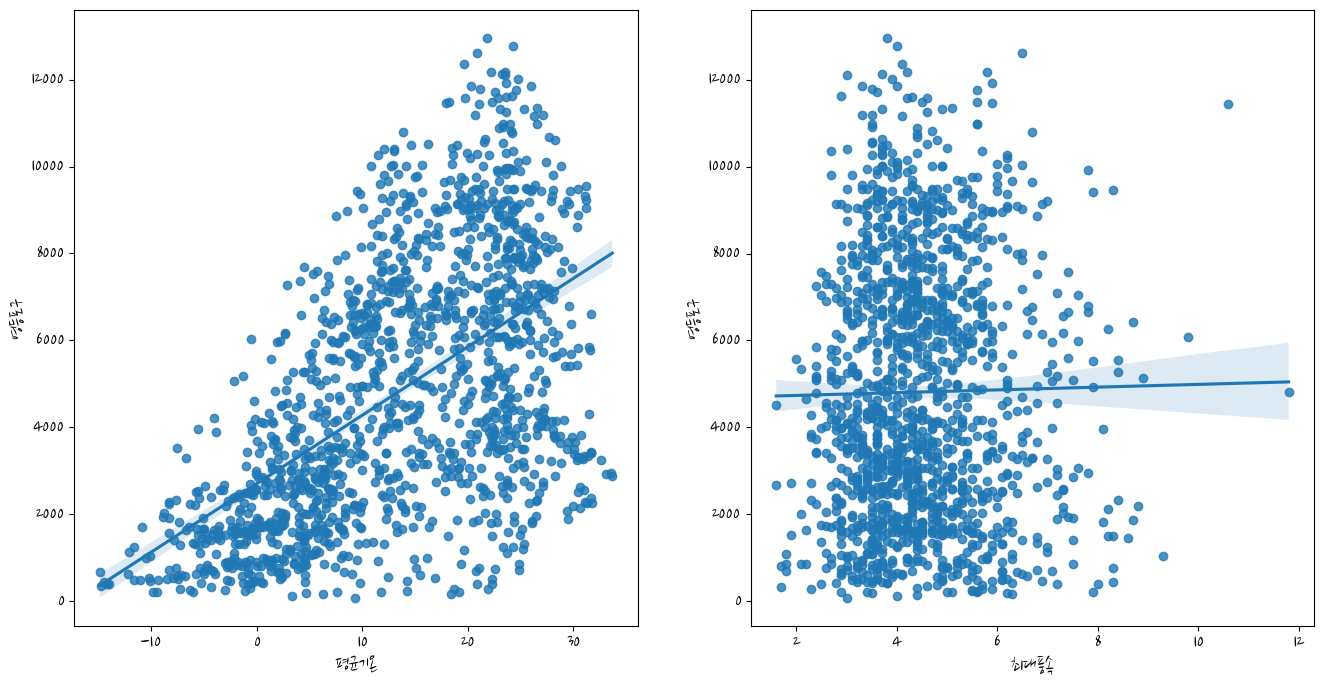

In [185]:
fig, axs = plt.subplots(figsize=(16, 8), ncols = 2, nrows = 1)
mv_features = ['평균기온', '최대풍속']
for i, feature in enumerate(mv_features):
    sns.regplot(x=feature, y='영등포구', data = test5, ax = axs[i])

## 로지스틱 회귀해보기~

In [275]:
def get_top_error_data(y_test,pred,n_top=5):
    result_df = pd.DataFrame(y_test.values, columns=['real'])
    result_df['pred']=np.round(pred)
    result_df['diff']= np.abs(result_df['real']- result_df['pred'])
    print(result_df['diff'].mean())
    print(result_df)

In [262]:
test5

,평균기온,최저기온,최고기온,일강수량,최대순간풍속,최대순간풍속풍향,최대풍속,최대풍속풍향,평균풍속,최다풍향,...,일최심신적설,강수여부,일 미세먼지 농도(㎍/㎥),휴일여부,요일,계절,year,month,day,영등포구
0,-1.3,-5.1,3.8,0.0,7.0,320,3.8,290,1.4,290,...,0.0,0.0,38.0,1,0,4,2018,1,1,421.0
1,-1.8,-4.3,1.8,0.0,8.5,270,4.9,290,1.8,290,...,0.0,0.0,32.0,0,1,4,2018,1,2,820.0
2,-4.7,-7.1,-0.4,0.0,6.6,320,3.5,270,2.2,290,...,0.0,0.0,32.0,0,2,4,2018,1,3,839.0
3,-4.7,-8.7,-0.7,0.0,5.8,320,3.5,320,1.4,290,...,0.0,0.0,40.0,0,3,4,2018,1,4,749.0
4,-3.0,-5.6,1.6,0.0,8.0,250,3.6,270,1.7,290,...,0.0,0.0,46.0,0,4,4,2018,1,5,878.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-7.6,-12.9,-3.9,0.0,5.5,340,3.1,20,1.7,50,...,0.0,0.0,33.0,0,0,4,2021,12,27,3517.0
1457,-4.1,-8.5,-0.9,0.0,4.9,50,3.1,50,2.2,50,...,0.0,0.0,60.0,0,1,4,2021,12,28,4214.0
1458,0.4,-3.8,5.9,0.2,10.8,270,5.9,270,2.6,50,...,0.3,1.0,70.0,0,2,4,2021,12,29,4126.0
1459,-3.9,-6.8,0.2,0.0,12.3,320,6.6,290,3.3,270,...,0.0,0.0,30.0,0,3,4,2021,12,30,3883.0


In [288]:
X = test5.drop(columns=['영등포구'])
y = test5['영등포구']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [264]:
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(accuracy_score(y_test, lr_pred))

0.0


In [276]:
get_top_error_data(y_test,lr_pred)

1913.7474402730375
       real    pred    diff
0    3613.0  7895.0  4282.0
1    7810.0  9223.0  1413.0
2    9411.0  6782.0  2629.0
3    4174.0  3440.0   734.0
4    1101.0  3636.0  2535.0
..      ...     ...     ...
288  6162.0  2776.0  3386.0
289  8400.0  5693.0  2707.0
290  3989.0  4837.0   848.0
291  2025.0  1917.0   108.0
292  2854.0  2043.0   811.0

[293 rows x 3 columns]


### 랜덤포레스트

In [290]:
from sklearn.ensemble import RandomForestRegressor

In [295]:
rf_reg = RandomForestRegressor(random_state=156, max_depth=8)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)


mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')


RMSE:  906.858
R2: 0.9071359164726414


In [296]:
for solve, predd in zip(y_test, pred):
    print(f'{solve}, {predd}')

3613.0, 3678.054963880958
7810.0, 9456.242934709777
9411.0, 9081.643364657362
4174.0, 5301.462854707005
1101.0, 1554.1460568028465
596.0, 2492.198140190974
2553.0, 1522.2374144658795
8704.0, 8190.47937467862
5704.0, 6050.632837822536
2302.0, 2614.5417076845038
5091.0, 5588.370785373033
6224.0, 5863.242457822646
7956.0, 6958.315072779901
762.0, 1273.4661582633055
9192.0, 9520.786875093592
4667.0, 5408.461467613624
11707.0, 10749.100032068513
8566.0, 8372.701658174992
9699.0, 9273.469851318945
2573.0, 2418.4267337169726
7301.0, 6919.485997997636
9872.0, 9736.993691473464
6212.0, 6120.8457093637935
8303.0, 7932.98224205571
7578.0, 5421.868435804204
6157.0, 5550.240315637406
5919.0, 7499.492982913693
7197.0, 7232.318707935379
7715.0, 8289.447706768258
1486.0, 1710.4633582555193
932.0, 1360.094279501
5126.0, 4530.73187424564
1693.0, 1783.4237135749956
709.0, 626.9396547303543
6905.0, 6855.920055065952
7176.0, 3847.9624745672277
4035.0, 5726.964492155617
748.0, 1514.603679070922
5920.0, 6543

In [299]:
# 문자열 치환 원앤핫인코딩
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [300]:
rf_reg = RandomForestRegressor(random_state=156, max_depth=8)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)


mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')


RMSE:  0.284
R2: 0.8835942493389938


In [301]:
for solve, predd in zip(y_test, pred):
    print(f'{solve}, {predd}')

8.192570471152173, 8.167261483814364
8.963288275610298, 9.158999854964213
9.149740749847252, 9.143411170423214
8.336869637284956, 8.603654129942154
7.004881989712859, 7.682647184528113
6.391917113392602, 7.735476917709001
7.845416036592485, 7.377702221540708
9.07165285220229, 8.974697920216098
8.649098262296176, 8.693046522479069
7.741967899820685, 7.903675764854176
8.535425959677298, 8.510588597683528
8.736328721332908, 8.652808580149138
8.981807323377534, 8.816316003740734
6.637258031284457, 7.481304078386489
9.126197603863755, 9.14579601396585
8.448485993406447, 8.620787515598993
9.368027647811777, 9.206544199738133
9.055672891964043, 8.971695777280235
9.179881164491475, 9.153250732749747
7.853216388156072, 7.534499457998297
8.895903562215581, 8.815331264939482
9.19755903761145, 9.158999854964213
8.734399150063695, 8.739854732754178
9.024492605405669, 8.956943864396994
8.93313654381203, 8.710736746090285
8.725507328484445, 8.506867231831984
8.68609172787805, 8.855988032641909
8.8815

In [302]:
from sklearn.model_selection import GridSearchCV

In [315]:
params = {
 'max_depth': [16,17,18,19,20],
    'min_samples_split': [1,2,3,4,5],
    'min_samples_leaf':[2,3,4,5,6],
}

In [316]:
rf_reg = RandomForestRegressor(n_estimators=100,random_state=156, n_jobs= -1)
grid_cv = GridSearchCV(rf_reg, param_grid=params , cv = 2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_test)

print(grid_cv.best_params_)
print(grid_cv.best_score_)


mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')


{'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.841056831731049
RMSE:  0.274
R2: 0.8917148008074077


In [319]:
rf_reg = RandomForestRegressor(n_estimators=500,random_state=156, max_depth=19, min_samples_leaf=2, min_samples_split=2,n_jobs= -1)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)


mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')


RMSE:  0.272
R2: 0.8933523366525651


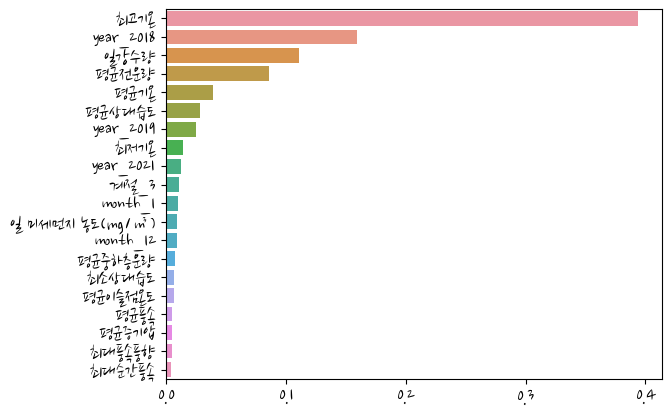

In [321]:
inf = rf_reg.feature_importances_
fff = pd.Series(inf, index = X_train.columns)
ft20 = fff.sort_values(ascending = False)[:20]

sns.barplot(x = ft20, y = ft20.index)
plt.show()

In [324]:
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    print(f'{solve}, {predd}')

3612.9999999999977, 3582.8424264593314
7810.000000000003, 10155.177611269868
9410.999999999993, 9422.00323936931
4173.999999999999, 5015.516715996591
1100.9999999999995, 2151.277224232416
596.0000000000001, 2198.202168272747
2553.0000000000005, 1553.665634262917
8704.0, 8131.546291109276
5704.000000000002, 6136.133076371276
2302.0000000000005, 2553.552666993116
5091.000000000003, 4966.198414184886
6224.0, 5715.446826833686
7955.999999999996, 7310.175842071969
761.9999999999999, 1724.3941135828577
9192.000000000002, 9430.096199700787
4667.0, 5242.751256615246
11707.00000000001, 11291.998602868394
8565.999999999996, 8503.432494554068
9699.000000000004, 9087.235332343242
2573.000000000001, 1800.2624518208825
7300.999999999994, 7328.97378621611
9872.000000000004, 10053.597652323675
6212.000000000005, 5773.413768619573
8302.999999999995, 7850.146679306541
7578.000000000002, 5964.170930029939
6156.999999999998, 4974.579470697649
5918.9999999999945, 7072.110851789611
7197.000000000004, 7346.9

### GBM

In [325]:
from sklearn.ensemble import GradientBoostingRegressor
import time

In [326]:
%%time

gb_ref = GradientBoostingRegressor(random_state=156)
gb_ref.fit(X_train, y_train)
gb_pred = gb_ref.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

RMSE:  0.272
R2: 0.8933523366525651
Wall time: 511 ms


In [327]:
%%time
grid_cv = GridSearchCV(gb_ref, param_grid=params , cv = 2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_test)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

{'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
0.8615007911748296
RMSE:  0.245
R2: 0.9137792206434536
Wall time: 32.9 s


In [331]:
gb_ref = GradientBoostingRegressor(n_estimators=200, max_depth=16, min_samples_leaf=6, min_samples_split=2, random_state=156)
gb_ref.fit(X_train, y_train)
gb_pred = gb_ref.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

RMSE:  0.245
R2: 0.9137792206434536


### LightGBM

In [261]:
from lightgbm import LGBMRegressor

In [262]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm.predict(X_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, preds)}')

NameError: name 'X_train' is not defined

In [263]:
from lightgbm import plot_importance

NameError: name 'lgbm' is not defined

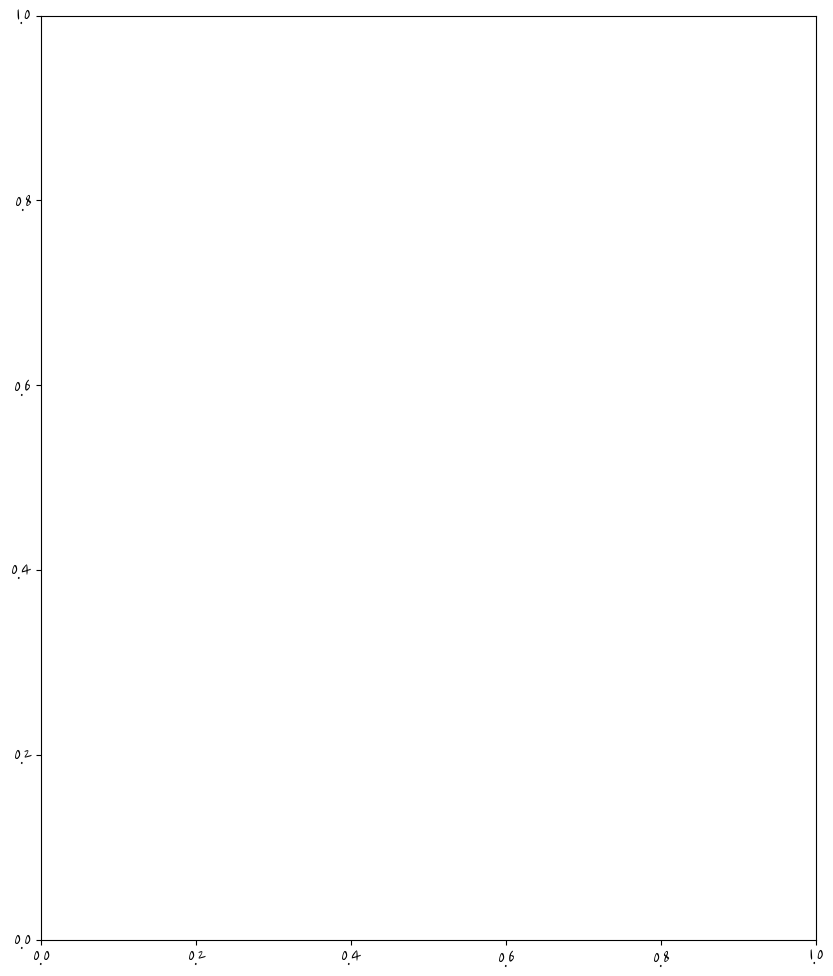

In [264]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm, ax=ax)

In [341]:
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    print(f'{solve}, {predd}')

3612.9999999999977, 3580.19010831857
7810.000000000003, 9605.611496633017
9410.999999999993, 9335.21255032943
4173.999999999999, 4498.63169862656
1100.9999999999995, 2181.752532404412
596.0000000000001, 1972.8831489065083
2553.0000000000005, 1669.5472414372164
8704.0, 8440.692087486857
5704.000000000002, 6116.090245107468
2302.0000000000005, 2367.724937549679
5091.000000000003, 5335.977733428198
6224.0, 6412.479122857402
7955.999999999996, 6865.265001193355
761.9999999999999, 1228.1636035923182
9192.000000000002, 9800.29277064811
4667.0, 5253.964098034155
11707.00000000001, 11000.131138983417
8565.999999999996, 8380.303047250241
9699.000000000004, 10114.18829110346
2573.000000000001, 2550.0763296527493
7300.999999999994, 7403.522375645509
9872.000000000004, 10328.751075149234
6212.000000000005, 5809.923498563267
8302.999999999995, 8051.6316707912465
7578.000000000002, 5529.305745331514
6156.999999999998, 5637.801840797033
5918.9999999999945, 6701.281909729887
7197.000000000004, 7606.53

In [342]:
from hyperopt import hp

In [343]:
lgb_space = {
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1,2,1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
    'colsample_bytree' : hp.uniform('colsample_bytree',0.5,1)
}


,,corr
평균기온,최고기온,0.989298
최고기온,평균기온,0.989298
평균기온,최저기온,0.989262
최저기온,평균기온,0.989262
평균이슬점온도,최저기온,0.967202
최저기온,평균이슬점온도,0.967202
최고기온,최저기온,0.961977
최저기온,최고기온,0.961977
평균기온,평균이슬점온도,0.953476
평균이슬점온도,평균기온,0.953476


### 인구추가 18년도

In [95]:
peo = pd.read_csv('2018년_일별_영등포_유동인구.csv')

In [96]:
tt18 = tt18[['month', 'day', '평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속',
       '최대풍속풍향', '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압',
       '평균전운량', '평균중하층운량', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부',
       '요일', '계절', '영등포구']]

In [97]:
t18= pd.concat([tt18, peo], axis=1)

In [98]:
t18 = t18[['month', 'day', '평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속',
       '최대풍속풍향', '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압',
       '평균전운량', '평균중하층운량', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부',
       '요일', '계절', '총생활인구수','영등포구']]

In [99]:
t18[[ '강수여부','휴일여부','요일', '계절', 'month','day',]]= t18[[ '강수여부','휴일여부','요일', '계절', 'month','day']].astype('str')

In [85]:
t18.shape

(365, 27)

In [86]:
X = t18.drop(columns=['영등포구'])
y = t18['영등포구']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

lr_reg = LinearRegression() #선형회귀
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

LinearRegression RMSE:  699.23
R2: 0.7843682288119554
Ridge RMSE:  700.175
R2: 0.783785003898332
Lasso RMSE:  704.356
R2: 0.7811948414090679


[699.2295578695778, 700.1745316000631, 704.3559406087303]

### 전처리 추가

In [89]:
log_test = np.log1p(t18['영등포구'])

In [90]:
# 왜곡도 확인
features_index = t18.dtypes[t18.dtypes != 'object'].index
skew_features= t18[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features>1]
skew_features_top.sort_values(ascending=False)
skew_features_top.index

Index(['일강수량', '최대순간풍속', '평균풍속', '일최심적설', '일최심신적설'], dtype='object')

In [91]:
# 왜곡도 1 이상은 로그로 변환
t18d[skew_features_top.index]= np.log1p(t18[skew_features_top.index])

In [92]:
t18d = pd.get_dummies(t18)

In [93]:
X = t18d.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

lr_reg = LinearRegression() #선형회귀
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

LinearRegression RMSE:  0.361
R2: 0.7851564410872697
Ridge RMSE:  0.354
R2: 0.7932455772171193
Lasso RMSE:  0.491
R2: 0.6028635087393839


[0.3613227262615152, 0.35445533199083584, 0.49125163259726856]

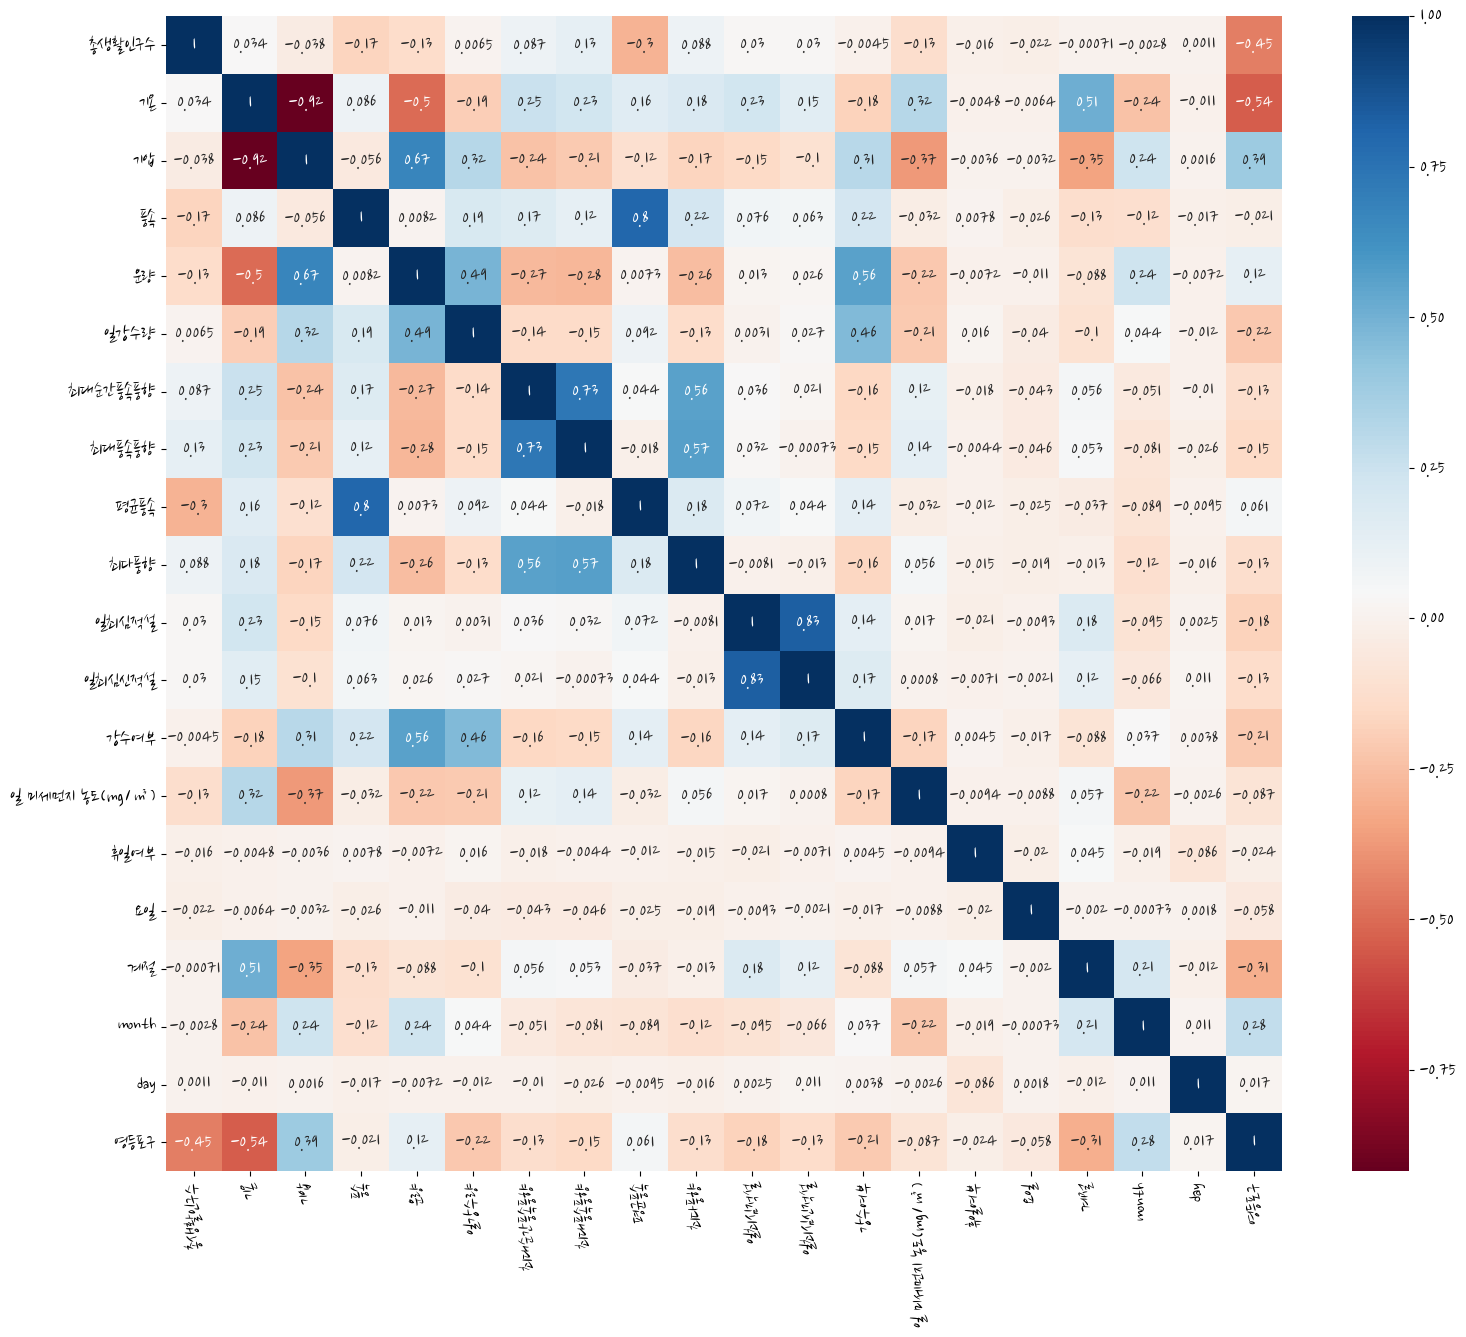

In [197]:
plt.figure(figsize=(18, 15))
corr = df.corr()
sns.heatmap(corr, cmap='RdBu', annot=True)
plt.savefig('myfigure.png', transparent = True)

In [187]:
df = pd.read_csv('2018_2021_전처리_최종.csv')

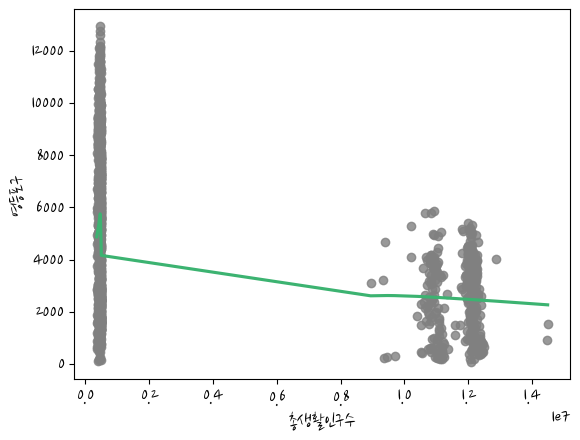

In [200]:
 sns.regplot(x='총생활인구수', y='영등포구', data = df , lowess=True,
            line_kws={'color': 'mediumseagreen'}, scatter_kws={'color': 'gray'})
plt.savefig('myfigure.png', transparent = True)

In [201]:
df['총생활인구수'].value_counts()

4.698200e+05    13
1.053426e+07     1
4.648272e+05     1
4.616589e+05     1
4.646550e+05     1
                ..
4.368142e+05     1
4.820872e+05     1
4.813412e+05     1
4.850527e+05     1
4.632582e+05     1
Name: 총생활인구수, Length: 1449, dtype: int64

In [247]:
df.columns

Index(['총생활인구수', '기온', '기압', '풍속', '운량', '일강수량', '최대순간풍속풍향', '최대풍속풍향', '평균풍속',
       '최다풍향', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부', '요일', '계절',
       'month', 'day', '영등포구'],
      dtype='object')

In [250]:
df.columns

Index(['일시', '평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속',
       '최대풍속풍향', '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압',
       '평균전운량', '평균중하층운량', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부',
       '요일', '계절', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구',
       '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구', '일합계', 'year', 'month',
       'day'],
      dtype='object')

In [266]:
test5.shape

(1461, 27)